<a href="https://colab.research.google.com/github/RainDeath29/PracticeWork/blob/main/PracticeWork_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

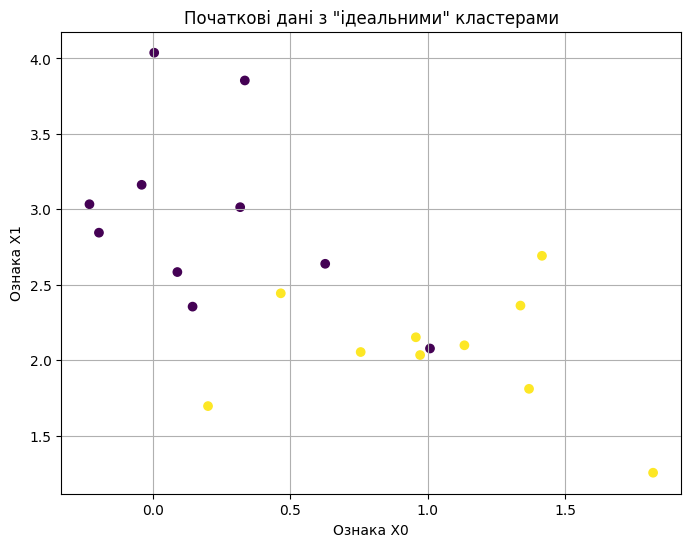

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score

X_data_cluster = np.array([[ 0.62696733,  2.63939119],
       [ 0.00466506,  4.03822176],
       [-0.23099219,  3.03425207],
       [ 0.08892389,  2.58473559],
       [ 1.00835424,  2.07814169],
       [ 0.33444383,  3.8543603 ],
       [-0.04105846,  3.16281876],
       [ 0.1443278 ,  2.3555469 ],
       [-0.19643072,  2.84555262],
       [ 0.31755827,  3.01467852],
       [ 0.97239211,  2.03479492],
       [ 1.33758902,  2.3624779 ],
       [ 1.13357884,  2.09935491],
       [ 0.20048288,  1.69646692],
       [ 1.41587009,  2.69232843],
       [ 0.75610094,  2.05472659],
       [ 1.8203091 ,  1.25480484],
       [ 0.95690292,  2.15255268],
       [ 0.46529846,  2.44383885],
       [ 1.36879175,  1.81075615]])

y_true_cluster = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

plt.figure(figsize=(8, 6))
plt.scatter(X_data_cluster[:, 0], X_data_cluster[:, 1], c=y_true_cluster, cmap='viridis')
plt.title('Початкові дані з "ідеальними" кластерами')
plt.xlabel('Ознака X0')
plt.ylabel('Ознака X1')
plt.grid(True)
plt.show()

### 1. Метод k-середніх (KMeans)

Знайдені мітки кластерів: [0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1]
Прогноз для нової точки [1.  2.5]: кластер 1
Оцінка якості (Adjusted Rand Score): 0.6200


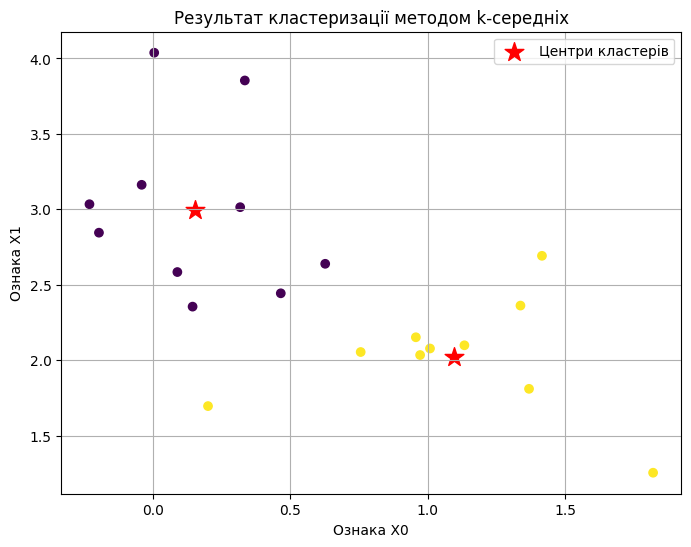

In [4]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X_data_cluster)

X_new = np.array([[1.0, 2.5]])
y_pred_new = kmeans.predict(X_new)

score_kmeans = adjusted_rand_score(y_true_cluster, kmeans.labels_)

print(f"Знайдені мітки кластерів: {kmeans.labels_}")
print(f"Прогноз для нової точки {X_new[0]}: кластер {y_pred_new[0]}")
print(f"Оцінка якості (Adjusted Rand Score): {score_kmeans:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(X_data_cluster[:, 0], X_data_cluster[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='*', s=200, c='red', label='Центри кластерів')
plt.title('Результат кластеризації методом k-середніх')
plt.xlabel('Ознака X0')
plt.ylabel('Ознака X1')
plt.legend()
plt.grid(True)
plt.show()

### 2. Агломеративна кластеризація

Знайдені мітки кластерів: [0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0]
Оцінка якості (Adjusted Rand Score): 0.3304

Примітка: Агломеративна кластеризація в scikit-learn не має методу predict для нових точок.


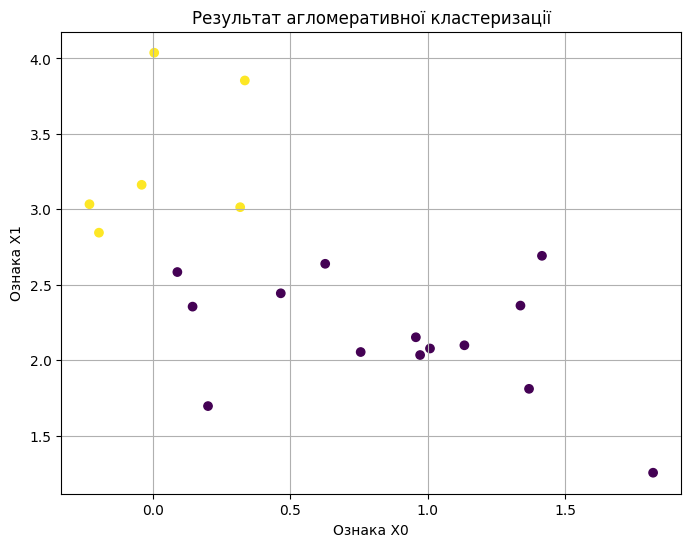

In [5]:
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clustering.fit(X_data_cluster)

score_agg = adjusted_rand_score(y_true_cluster, agg_clustering.labels_)

print(f"Знайдені мітки кластерів: {agg_clustering.labels_}")
print(f"Оцінка якості (Adjusted Rand Score): {score_agg:.4f}")
print("\nПримітка: Агломеративна кластеризація в scikit-learn не має методу predict для нових точок.")

plt.figure(figsize=(8, 6))
plt.scatter(X_data_cluster[:, 0], X_data_cluster[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.title('Результат агломеративної кластеризації')
plt.xlabel('Ознака X0')
plt.ylabel('Ознака X1')
plt.grid(True)
plt.show()

### 3. Кластеризація DBSCAN

Знайдені мітки кластерів: [ 0 -1 -1  0  0 -1 -1  0  0  0  0  0  0 -1  0  0 -1  0  0  0]
Оцінка якості (Adjusted Rand Score): -0.0044

Примітка: DBSCAN не має методу predict для нових точок.


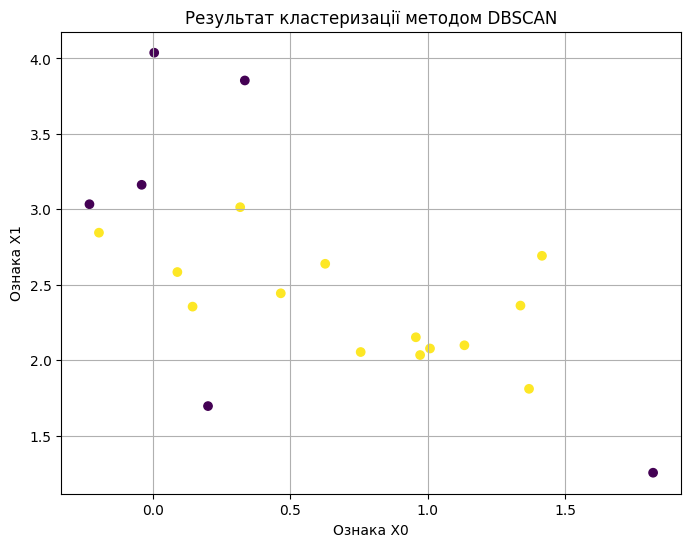

In [6]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_data_cluster)

score_dbscan = adjusted_rand_score(y_true_cluster, dbscan.labels_)

print(f"Знайдені мітки кластерів: {dbscan.labels_}")
print(f"Оцінка якості (Adjusted Rand Score): {score_dbscan:.4f}")
print("\nПримітка: DBSCAN не має методу predict для нових точок.")

plt.figure(figsize=(8, 6))
plt.scatter(X_data_cluster[:, 0], X_data_cluster[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title('Результат кластеризації методом DBSCAN')
plt.xlabel('Ознака X0')
plt.ylabel('Ознака X1')
plt.grid(True)
plt.show()

### Загальні висновки по Задачі 8

В результаті виконання завдання було проведено порівняння трьох методів кластеризації: k-середніх, агломеративного та DBSCAN. Якість кластеризації оцінювалася за допомогою метрики Adjusted Rand Score шляхом порівняння отриманих міток з еталонними.

Результати порівняння представлені в таблиці:

| Метод кластеризації | Оцінка якості (Adjusted Rand Score) |
| :--- | :--- |
| **K-Means** | **0.6200** |
| **Агломеративна кластеризація** | 0.3304 |
| **DBSCAN (з eps=0.5)** | -0.0044 |

**Загальний висновок:**

Найкращий результат для даного набору даних показав **метод k-середніх**, який досяг оцінки якості 0.62, допустивши лише одну помилку в кластеризації. Агломеративна кластеризація також змогла виявити структуру в даних, але з меншою точністю (оцінка 0.33).

Метод DBSCAN з початковими параметрами (`eps=0.5`) не зміг знайти чіткі кластери, визначивши більшість точок як "шум", що призвело до негативної оцінки. Це демонструє високу чутливість даного алгоритму до гіперпараметрів та характеру розподілу даних. Таким чином, для цього завдання найбільш ефективним виявився метод k-середніх.